In [243]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.stats import norm
import scipy.stats as stats
import matplotlib.mlab as mlab
import seaborn as sns;sns.set()

In [244]:
def remove_outliers(data, pp1, pp2):
    '''
    Based on "Data Outlier Detection using the Chebyshev Theorem",
    Brett G. Amidan, Thomas A. Ferryman, and Scott K. Cooley
    Keyword arguments:
        data -- A numpy array of discrete or continuous data
        pp1 -- likelihood of expected outliers (e.g. 0.1, 0.05 , 0.01)
        pp2 -- final likelihood of real outliers (e.g. 0.01, 0.001 , 0.0001)
    '''

    mu1 = np.mean(data)
    sigma1 = np.std(data)
    k = 1./ np.sqrt(pp1)
    odv1u = mu1 + k * sigma1
    odv1l = mu1 - k * sigma1
    new_data = data[np.where(data <= odv1u)[0]]
    new_data = new_data[np.where(new_data >= odv1l)[0]]
    mu2 = np.mean(new_data)
    sigma2 = np.std(new_data)
    k = 1./ np.sqrt(pp2)
    odv2u = mu2 + k * sigma2
    odv2l = mu2 - k * sigma2
    final_data = new_data[np.where(new_data <= odv2u)[0]]
    final_data = new_data[np.where(final_data >= odv2l)[0]]
    return final_data

In [221]:
#obtain the loaded data as arrays

def load_data(csv_sheet):
    x = list()
    y = list()
    o = list()
    with open(csv_sheet, 'rb') as f:
        reader = csv.reader(f)
        for row in reader:
            x.append(float(row[0]))
            y.append(float(row[1]))
            o.append(float(row[2]))
        
    x = np.array(x)
    y = np.array(y)
    o = np.array(o)
    return x,y,o

In [222]:
str_x, str_y, str_o = load_data('camera poses straight - Sheet1.csv')

Plots before the removal of outliers for the poses of the straight motion with object of small mass


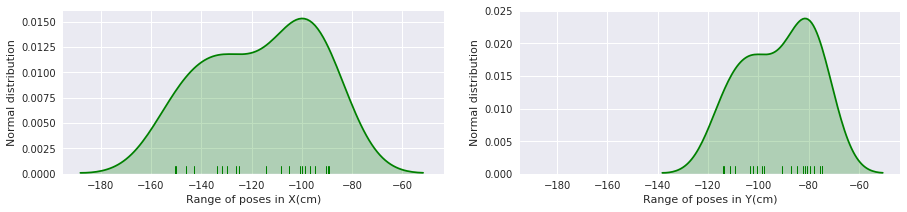

In [254]:
print "Plots before the removal of outliers for the poses of the straight motion with object of small mass"
f, axes = plt.subplots(1, 2, figsize=(15, 3), sharex=True)

sns.distplot(str_x, hist=False, color="g", kde_kws={"shade": True}, ax=axes[0], rug=True)
axes[0].set_xlabel('Range of poses in X(cm)')
axes[0].set_ylabel('Normal distribution')
sns.distplot(str_y, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1], rug=True)
axes[1].set_xlabel('Range of poses in Y(cm)')
axes[1].set_ylabel('Normal distribution')
plt.show()

Plots before the removal of outliers for the orientation of the straight motion with object of small mass


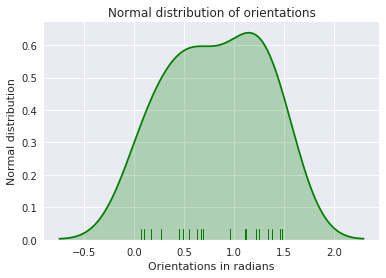

In [255]:
print "Plots before the removal of outliers for the orientation of the straight motion with object of small mass"
sns.distplot(str_o, hist=False, color="g", kde_kws={"shade": True}, rug=True)
plt.title('Normal distribution of orientations')
plt.xlabel('Orientations in radians')
plt.ylabel('Normal distribution')
plt.show()

In [256]:
left_x, left_y, left_o = load_data('camera poses left - Sheet1.csv')

Plots before the removal of outliers for the poses of the left motion with object of small mass


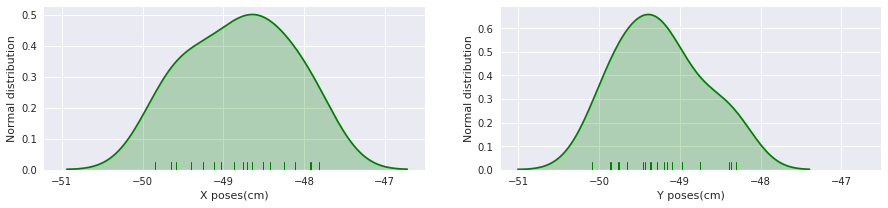

In [257]:
print "Plots before the removal of outliers for the poses of the left motion with object of small mass"

f, axes = plt.subplots(1, 2, figsize=(15, 3), sharex=True)

sns.distplot(left_x, hist=False, color="g", kde_kws={"shade": True}, ax=axes[0], rug=True)
axes[0].set_xlabel('X poses(cm)')
axes[0].set_ylabel('Normal distribution')
sns.distplot(left_y, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1], rug=True)
axes[1].set_xlabel('Y poses(cm)')
axes[1].set_ylabel('Normal distribution')
plt.show()

Normal distribution of orientation for placing marker left


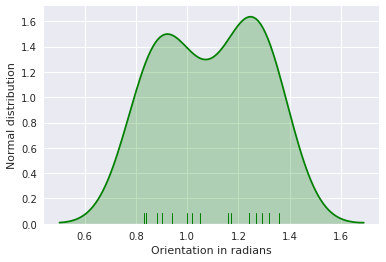

In [260]:
print "Normal distribution of orientation for placing marker left"
sns.distplot(left_o, hist=False, color="g", kde_kws={"shade": True}, rug=True)
plt.xlabel('Orientation in radians')
plt.ylabel('Normal distribution')
plt.show()

In [261]:
#get the poses for placing right
right_x, right_y, right_o = load_data('camera poses right - Sheet1.csv')

Plots before the removal of outliers for the poses of the right motion with object of small mass


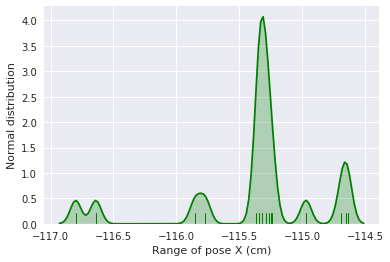

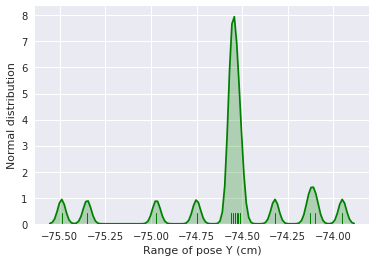

In [262]:
print "Plots before the removal of outliers for the poses of the right motion with object of small mass"
sns.distplot(right_x, hist=False, color="g", kde_kws={"shade": True}, rug=True)
plt.xlabel('Range of pose X (cm)')
plt.ylabel('Normal distribution')
plt.show()
sns.distplot(right_y, hist=False, color="g", kde_kws={"shade": True}, rug=True)
plt.xlabel('Range of pose Y (cm)')
plt.ylabel('Normal distribution')
plt.show()

Normal distribution of orientation for placing marker right


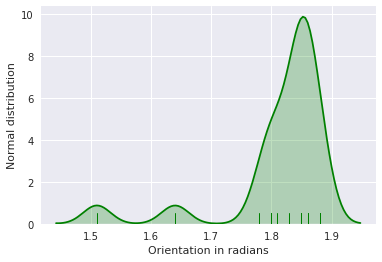

In [264]:
print "Plots before the removal of outliers for the orientation of the right motion with object of small mass"
sns.distplot(right_o, hist=False, color="g", kde_kws={"shade": True}, rug=True)
plt.xlabel('Orientation in radians')
plt.ylabel('Normal distribution')
plt.show()

Plots after the removal of outliers for the poses of the right motion with object of small mass


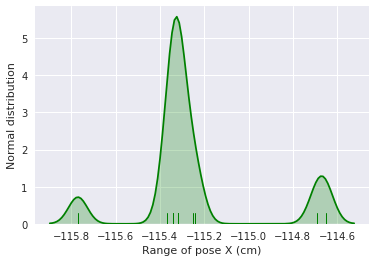

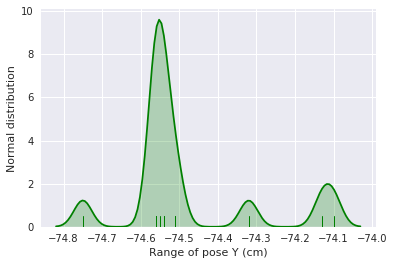

In [265]:
#Removing the outliers
print "Plots after the removal of outliers for the poses of the right motion with object of small mass"
right_x_ = remove_outliers(right_x, 0.25, 0.4)
sns.distplot(right_x_, hist=False, color="g", kde_kws={"shade": True}, rug=True)
plt.xlabel('Range of pose X (cm)')
plt.ylabel('Normal distribution')
plt.show()

right_y_ = remove_outliers(right_y, 0.35, 0.4)
sns.distplot(right_y_, hist=False, color="g", kde_kws={"shade": True}, rug=True)
plt.xlabel('Range of pose Y (cm)')
plt.ylabel('Normal distribution')
plt.show()

Plots after the removal of outliers for the poses of the right motion with object of small mass


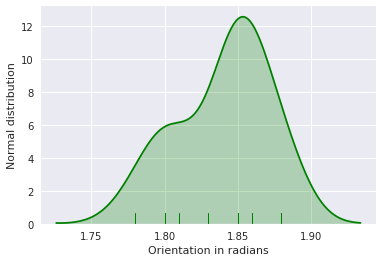

In [267]:
print "Plots after the removal of outliers for the poses of the right motion with object of small mass"
right_o_ = remove_outliers(right_o, 0.1, 0.1)
sns.distplot(right_o_, hist=False, color="g", kde_kws={"shade": True}, rug=True)
plt.xlabel('Orientation in radians')
plt.ylabel('Normal distribution')
plt.show()